<a href="https://colab.research.google.com/github/rileenas/ML-projects/blob/ML-Courseowork-(Prediction-and-Image-Classification)--Loughborough-University/ML_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart disease dataset: heart disease prediction using Scikit-Learn

##Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

We intend to use the following algorithms for this project:

**Random Forest:** A random forest classifier is a type of ensemble learning method that is used for classification tasks. Ensemble learning methods combine the predictions of multiple individual models to make more accurate predictions than any of the individual models would.

**Logistic Regression:** Logistic regression is a type of statistical analysis that is used to predict the probability of an event occurring. It is a supervised learning algorithm that is used in classification tasks. In logistic regression, the dependent variable is binary, which means it only has two possible outcomes (e.g. 0 or 1, yes or no, true or false). 

Loading the dataset

In [ ]:
heart = pd.read_csv('/content/drive/MyDrive/heart.csv')

##Exploratory data analysis (EDA)

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**age:** age

**sex:** 0 = female, 1 = male

**cp:** chest pain type (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)

**trestbps:** resting blood pressure (mm Hg)

**chol:** serum cholestrol (mg/dl)

**fbs:** fasting blood sugar (>120 mg/dl? 1 = true, 0 = false)

**restecg:** resting ecg results (0 = normal, 1 = ST-T wave abnormality, 2 = probable or definite left venticular hypertrophy)

**thalach:** max heart rate 

**exang:** exercise induced angina (0 = no, 1 = true)

**oldpeak:** ST depression induced by exercise relative to rest

**slope:** The slope of the peak exercise ST segment (0: upsloping, 1: flat, 2: downsloping)

**ca:** The number of major vessels (0-3)

**thal:** A blood disorder called thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect, 0 could be missing/error data)

**target:** heart disease or not (0 = no, 1 = yes)

**source:** Kaggle (https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download)

In [ ]:
heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [ ]:
heart.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking for null values in the dataset

In [ ]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no null values

##Data Visualisation

Using Seaborn to visualise target values: 0 (no heart disease)and 1 (heart disease)

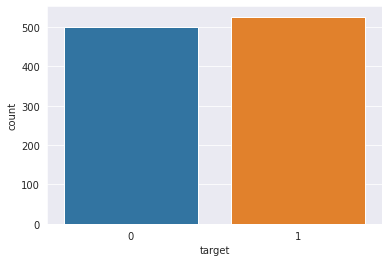

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='target', data=heart)

Numerically:

In [ ]:
heart['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

Correlation between features

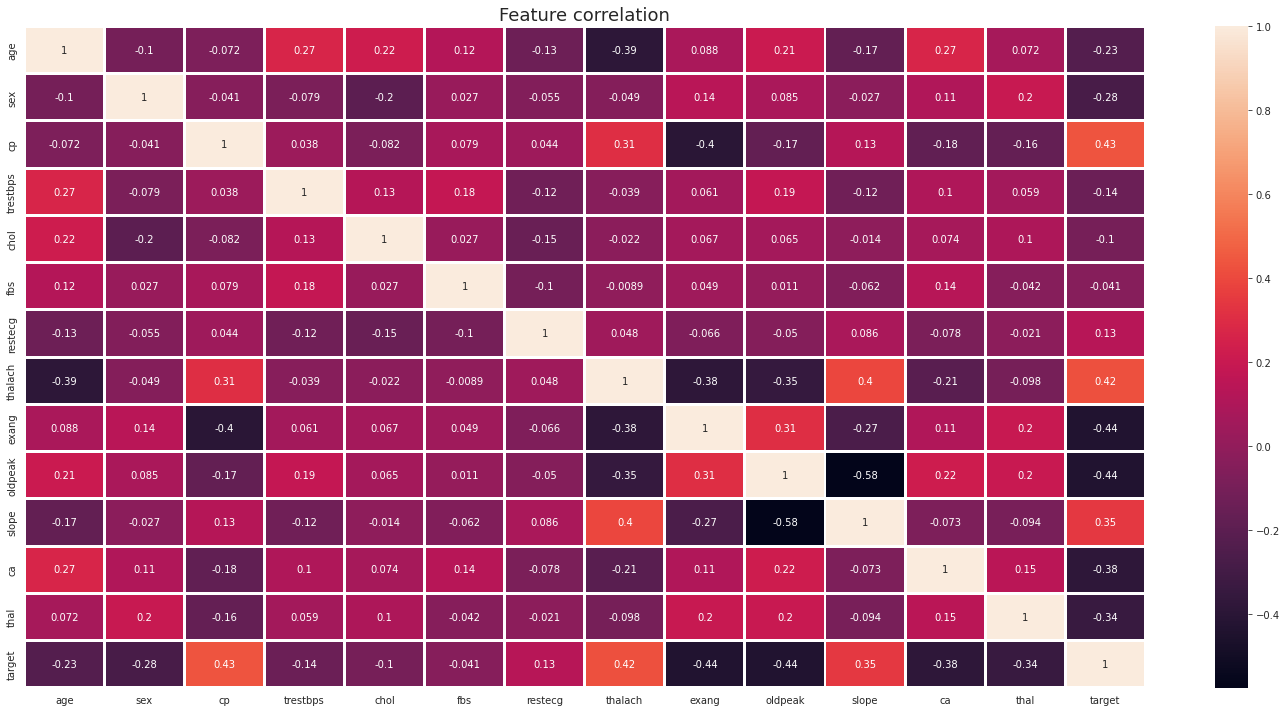

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(heart.corr(), annot=True, linewidth=2)
plt.title("Feature correlation", fontsize=18)
plt.tight_layout()

Inference from the chart given above:

Target has- 

**high negative** correlation with the following features:
exang, oldpeak, ca, and thal

**high positive** correlation with the following features:
cp, thalach, slope

**low negative** correlation with the following features:
age, sex, trestbps, chol, fbs

**low positive** correlation with the following feature:
restecg

Visualising our inference:

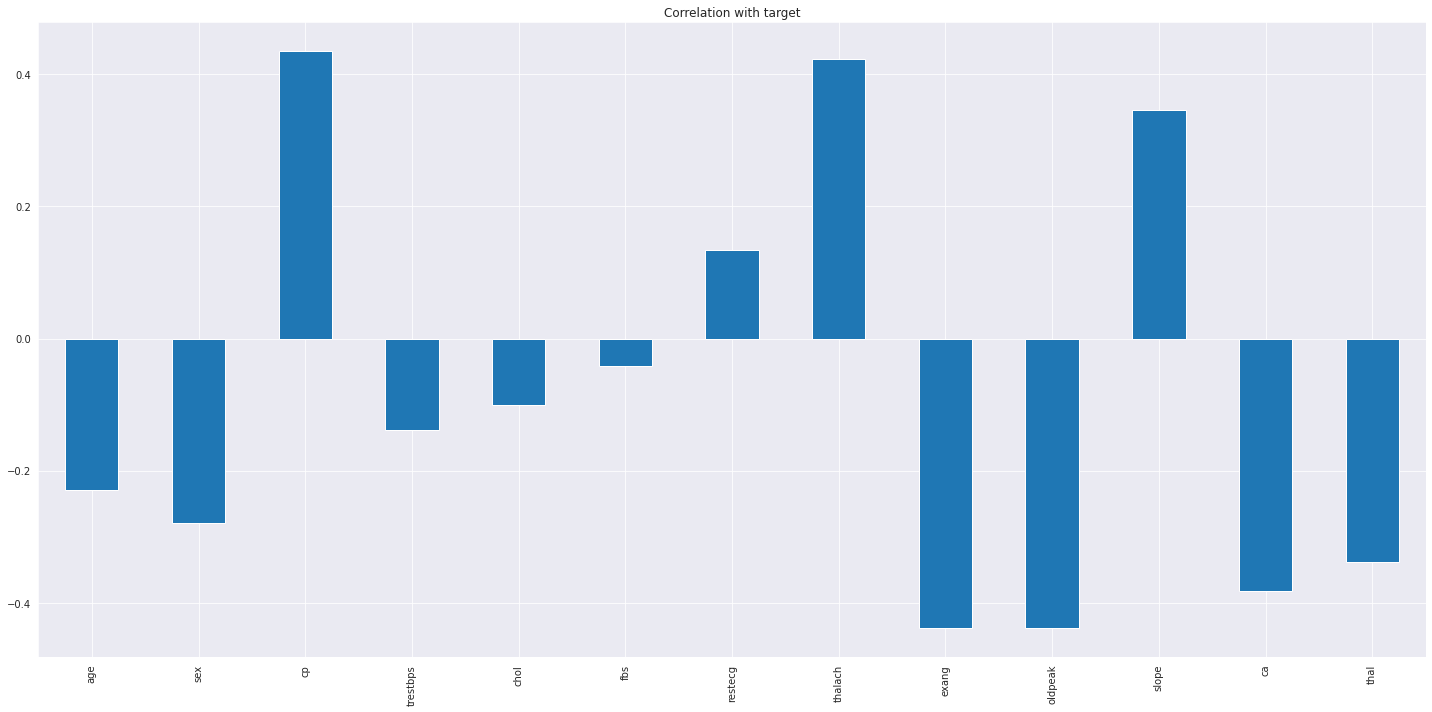

In [ ]:
heart.drop('target', axis=1).corrwith(heart.target).plot(kind='bar', grid=True, title='Correlation with target', figsize=(20,10))
plt.tight_layout()

##Data Manipulation

Creating X and y variables.

X contains the features

y contains the label (target)

In [ ]:
#Creating X and y variables

X = heart.drop('target', axis=1)
y = heart['target']

We split the data into three sets: train, validation, and test.

We first divide the dataset in 80:20 ratio, where 80% is the training data and 20% is the remaining dataset.

We then divide the remaining 20% of the dataset into validation and test sets, each containing 50% of the remaining data

In [ ]:
#Train-validation-test split

Train_X, Leftover_X, train_y, leftover_y = train_test_split(X, y, test_size = 0.2)
Test_X, Valid_X, test_y, valid_y = train_test_split(Leftover_X, leftover_y, test_size = 0.5)

Checking the train, validation and test datasets

In [ ]:
Train_X.shape

(820, 13)

In [ ]:
Valid_X.shape

(103, 13)

In [ ]:
Test_X.shape

(102, 13)

In [ ]:
train_y.shape

(820,)

Standardising data using StandardScalar from scikit-learn

In [ ]:
#Standardising data

standard = StandardScaler()
Train_X = standard.fit_transform(Train_X)
Valid_X = standard.transform(Valid_X)
Test_X = standard.transform(Test_X)

The dataset consists of a wide range of values among all columns. To generalise this and to ensure the data points are closer to each other, data scaling is performed. This enhances model performance drastically.

I have used the StandardScaler function from sklearn’s preprocessing module to standardise the data. It does this by removing the mean and scaling to unit variance. 

source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
#Dataset after being scaled

df = pd.DataFrame(Train_X[3:7])

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.354245,0.645163,0.034062,-0.675380,0.964029,-0.426094,0.901457,0.570977,-0.718131,-0.931069,1.019582,-0.735208,-0.512792
1,-2.113956,0.645163,-0.929073,-0.335166,0.715274,-0.426094,-0.984244,0.312564,1.392504,-0.931069,1.019582,-0.735208,1.098278
2,-0.703064,0.645163,0.034062,-0.108357,0.007281,-0.426094,-0.984244,1.346216,-0.718131,-0.762809,-0.594428,-0.735208,-0.512792
3,0.490768,0.645163,1.960332,2.159735,0.830084,-0.426094,-0.984244,0.441771,-0.718131,-0.762809,-0.594428,-0.735208,1.098278


##Training, validation and testing

###Using Logistic Regression:

In [ ]:
#Logistic Regression

lr = LogisticRegression()
lr.fit(Train_X, train_y)

#Testing with the validation set
predict_lr = lr.predict(Valid_X)

accuracy = accuracy_score(valid_y, predict_lr)
print("LR accuracy (Validation set): ", accuracy*100)

LR accuracy (Validation set):  79.6116504854369


In [ ]:
#Arranging the test labels in a dataframe
df = pd.DataFrame(test_y)
df['row_num'] = np.arange(len(df))

Checking a few individual data points in the test set

In [ ]:
Xnew = [Test_X[47]]
Xnew = standard.transform(Xnew)
ynew = lr.predict(Xnew)
ynew

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
df.iloc[47]

target      1
row_num    47
Name: 953, dtype: int64

In [ ]:
Xnew = [Test_X[69]]
Xnew = standard.transform(Xnew)
ynew = lr.predict(Xnew)
ynew

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
df.iloc[69]

target      0
row_num    69
Name: 843, dtype: int64

In [ ]:
Xnew = [Test_X[89]]
Xnew = standard.transform(Xnew)
ynew = lr.predict(Xnew)
ynew

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
df.iloc[89]

target      0
row_num    89
Name: 67, dtype: int64

In [ ]:
#Testing with the test set
predict_lr = lr.predict(Test_X)

accuracy = accuracy_score(test_y, predict_lr)
print("LR accuracy (Test set): ", accuracy*100)

LR accuracy (Test set):  81.37254901960785


In [ ]:
#Confusion matrix:
cm = confusion_matrix(test_y, predict_lr)
cm

array([[36, 13],
       [ 6, 47]])

###Using Random Forest Classifier

In [ ]:
#Random Forest Classifier

rf = RandomForestClassifier()
rf.fit(Train_X, train_y)

RandomForestClassifier()

In [ ]:
#Testing with the validation set
predict_rf = rf.predict(Valid_X)

In [ ]:
accuracy = accuracy_score(valid_y, predict_rf)
print("RF accuracy (Validation set): ", accuracy*100)

RF accuracy (Validation set):  96.11650485436894


In [ ]:
pd.DataFrame(Test_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.056647,-1.549997,0.034062,0.175155,0.102955,-0.426094,-0.984244,0.527908,-0.718131,0.246746,-0.594428,-0.735208,-0.512792
1,-1.679835,0.645163,0.997197,0.458666,1.461538,-0.426094,-0.984244,1.432354,-0.718131,-0.931069,1.019582,-0.735208,-0.512792
2,-0.160413,-1.549997,-0.929073,-0.108357,0.370845,-0.426094,-0.984244,-0.247331,-0.718131,-0.594550,-0.594428,-0.735208,-0.512792
3,0.382238,0.645163,0.997197,-1.128998,-0.279744,-0.426094,-0.984244,0.700184,-0.718131,1.172172,-0.594428,0.232482,1.098278
4,0.382238,-1.549997,0.997197,-0.675380,1.825102,-0.426094,0.901457,1.001665,-0.718131,-0.931069,1.019582,-0.735208,-0.512792
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.599298,0.645163,-0.929073,-0.108357,-0.738983,-0.426094,-0.984244,-0.721088,1.392504,1.088042,-0.594428,1.200171,1.098278
98,-1.245715,-1.549997,-0.929073,0.005048,1.844237,2.346899,-0.984244,-0.548812,1.392504,1.592820,-0.594428,-0.735208,1.098278
99,-1.571305,0.645163,-0.929073,1.139094,-0.413689,-0.426094,0.901457,1.389285,-0.718131,-0.931069,1.019582,-0.735208,1.098278
100,1.467540,0.645163,0.997197,2.726758,0.562194,2.346899,-0.984244,0.054151,1.392504,0.415005,-0.594428,-0.735208,1.098278


In [ ]:
Xnew = [Test_X[98]]
Xnew = standard.transform(Xnew)
ynew = rf.predict(Xnew)
ynew

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
df.iloc[98]

target      0
row_num    98
Name: 11, dtype: int64

In [ ]:
Xnew = [Test_X[99]]
Xnew = standard.transform(Xnew)
ynew = rf.predict(Xnew)
ynew

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
df.iloc[99]

target      0
row_num    99
Name: 289, dtype: int64

In [ ]:
Xnew = [Test_X[70]]
Xnew = standard.transform(Xnew)
ynew = rf.predict(Xnew)
ynew

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
df.iloc[70]

target      1
row_num    70
Name: 566, dtype: int64

In [ ]:
#Testing with the test set
predict_rf = rf.predict(Test_X)

accuracy = accuracy_score(test_y, predict_rf)
print("RF accuracy (Test set): ", accuracy*100)

RF accuracy (Test set):  100.0


In [ ]:
#Confusion matrix

cm = confusion_matrix(test_y, predict_rf)
cm

array([[49,  0],
       [ 0, 53]])

rf > lr, in accuracy

Therefore, final model = rf

#Sea animal dataset: image classification using TensorFlow

##Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils, models, layers
%matplotlib inline

##Data exploration and manipulation

In [ ]:
data_path = '/content/drive/MyDrive/sea_animal_dataset'

In [ ]:
data = utils.image_dataset_from_directory(data_path)

Found 8778 files belonging to 16 classes.


In [ ]:
data.class_names

['Corals',
 'Crabs',
 'Dolphin',
 'Eel',
 'Jelly Fish',
 'Lobster',
 'Nudibranchs',
 'Octopus',
 'Puffers',
 'Sea Rays',
 'Seahorse',
 'Seal',
 'Sharks',
 'Squid',
 'Starfish',
 'Whale']

Training data:

In [ ]:
train = utils.image_dataset_from_directory(data_path,
                                           validation_split = 0.2,
                                           subset = 'training',
                                           seed = 123,
                                           image_size = (180, 180),
                                           batch_size = 32)

Found 8778 files belonging to 16 classes.
Using 7023 files for training.


Testing data:

In [ ]:
test = utils.image_dataset_from_directory(data_path,
                                           validation_split = 0.2,
                                           subset = 'validation',
                                           seed = 123,
                                           image_size = (180, 180),
                                           batch_size = 32)

Found 8778 files belonging to 16 classes.
Using 1755 files for validation.


##Data visualisation

In [ ]:
sea_class = train.class_names
print(sea_class)

['Corals', 'Crabs', 'Dolphin', 'Eel', 'Jelly Fish', 'Lobster', 'Nudibranchs', 'Octopus', 'Puffers', 'Sea Rays', 'Seahorse', 'Seal', 'Sharks', 'Squid', 'Starfish', 'Whale']


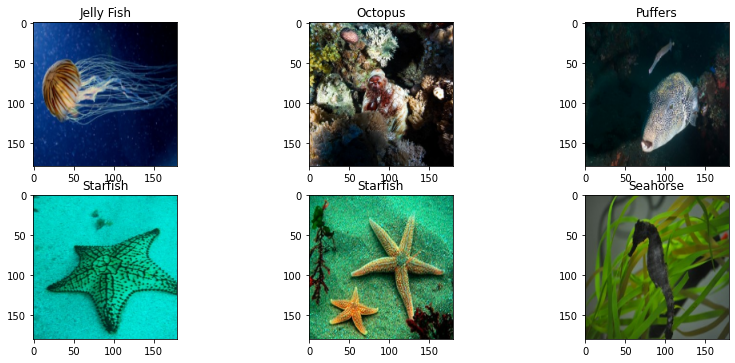

In [ ]:
plt.figure(figsize = (14, 9))

for image, label in train.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(sea_class[label[i]])


In [ ]:
for image_batch, label_batch in train.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 180, 180, 3)
(32,)


<ipython-input-43-775fa2e657e7>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3, 3, i+1)


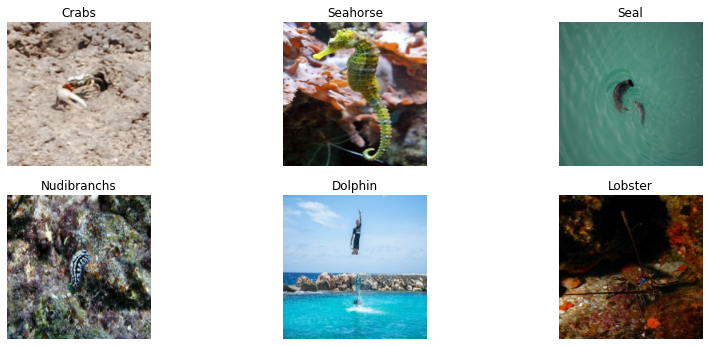

In [ ]:
plt.figure(figsize = (14, 9))

for image, label in train.take(2):
  for i in range(6):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(sea_class[label[i]])
    plt.axis('off')

Memory management:

In [ ]:
train = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Prefetching overlaps the preprocessing and model execution of a training step. While the model is executing training step s, the input pipeline is reading the data for step s+1

AUTOTUNE enhances performance by allocating CPU budget optimally. 

##Model creation and training

###Model 1

In [ ]:
model_1 = models.Sequential([layers.Rescaling(1.0/255),
                             layers.Conv2D(16, 4, padding='same', activation='relu', input_shape=(180, 180, 3)),
                             layers.MaxPooling2D(),
                             layers.Conv2D(32, 4, padding='same', activation='relu', input_shape=(180, 180, 3)),
                             layers.MaxPooling2D(),
                             layers.Conv2D(64, 4, padding='same', activation='relu', input_shape=(180, 180, 3)),
                             layers.MaxPooling2D(),
                             layers.Dropout(.2),
                             layers.Flatten(),
                             layers.Dense(128, activation='relu'),
                             layers.Dense(16, activation='softmax')])

**Sequential model:** In TensorFlow, a sequential model is a linear stack of layers. Each layer in the stack is connected to the previous layer and the next layer, allowing data to flow sequentially through the model from input to output. The Sequential class provides a convenient way to create simple feedforward neural networks, where the output of one layer is passed as the input to the next layer.

**Activation function:** an activation function is a function that is added into an artificial neural network in order to help the network learn complex patterns in the data. It takes in the output signal from the previous cell and converts it into some form that can be taken as input to the next cell.

**ReLU:** The ReLU function takes in a single input value and returns either 0 or the input value, depending on whether the input value is negative or positive. Specifically, the ReLU function is defined as:

f(x) = max(0, x)

where x is the input value. If x is greater than 0, the ReLU function returns x. If x is less than or equal to 0, the ReLU function returns 0.


**Softmax:** The Softmax function takes in a vector of real values and converts it into a probability distribution.

**Sigmoid:** Sigmoid takes any real value as input and outputs values in the range of 0 to 1. The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to 0.0.

**Max pooling:** Max pooling down-samples feature maps. It's typically used as a step in a convolutional neural network. The technique works by partitioning the input feature map into a set of non-overlapping rectangles (or pooling regions), and for each rectangle, outputting the maximum value within that rectangle

In [ ]:
model_1.compile(optimizer = 'adam',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])

**Optimizer:** An optimizer is a method or algorithm used to adjust the parameters of a machine learning model in order to minimise a loss function.

**Adam**: Adaptive Moment Estimation is combination of RMSProp and AdaGrad, that can tackle sparse gradients on noisy problems.

**RMSProp:** An optimizer that uses a decaying average of partial gradients in the adaptation of the step size for each parameter.

**Difference between Adam and RMSProp:** RMSProp uses the second moment by with a decay rate to speed up from AdaGrad. Adam uses both first and second moments, and is generally the best choice.

**Loss functions:** The loss function calculates the difference between the model's predicted output and the true output, and the result is used to update the model's parameters in order to minimise the overall loss.

**Sparse Categorical Crossentropy:** Sparse categorical crossentropy is a loss function used in training of neural networks, specifically in supervised learning problems with categorical labels. It is similar to categorical crossentropy, but is used when the classes are exclusive and the data for each sample is represented as an integer.



In [ ]:
!nvidia-smi

Wed Jan 11 19:41:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    29W /  70W |    346MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
summary = model_1.fit(train, 
            validation_data=test,
            epochs=5)

Epoch 1/5
220/220 [==============================] - 38s 175ms/step - loss: 2.0084 - accuracy: 0.3389 - val_loss: 2.0411 - val_accuracy: 0.3236
Epoch 2/5
220/220 [==============================] - 7s 31ms/step - loss: 1.8568 - accuracy: 0.3953 - val_loss: 1.9237 - val_accuracy: 0.3607
Epoch 3/5
220/220 [==============================] - 7s 32ms/step - loss: 1.6282 - accuracy: 0.4675 - val_loss: 1.8398 - val_accuracy: 0.4017
Epoch 4/5
220/220 [==============================] - 7s 32ms/step - loss: 1.2909 - accuracy: 0.5809 - val_loss: 2.0326 - val_accuracy: 0.3732
Epoch 5/5
220/220 [==============================] - 7s 32ms/step - loss: 0.9003 - accuracy: 0.7024 - val_loss: 2.3555 - val_accuracy: 0.3709


In [ ]:
df = pd.DataFrame(summary.history)

In [ ]:
df

,loss,accuracy,val_loss,val_accuracy
0,2.008374,0.338887,2.041127,0.323647
1,1.856804,0.395273,1.923717,0.360684
2,1.628155,0.467464,1.839843,0.401709
3,1.290933,0.580948,2.032586,0.373219
4,0.900326,0.702406,2.355499,0.370940


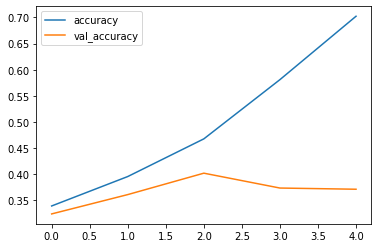

In [ ]:
df[['accuracy', 'val_accuracy']].plot()

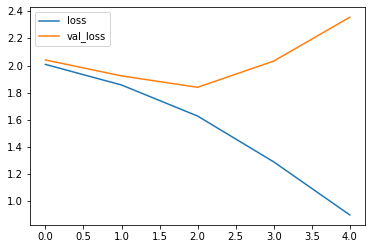

In [ ]:
df[['loss', 'val_loss']].plot()

Model overfitting

###Model 2

In [ ]:
model_2 = models.Sequential([layers.Rescaling(1.0/255),
                             layers.Conv2D(16, 4, padding='same', activation='relu', input_shape=(180, 180, 3)),
                             layers.MaxPooling2D(),
                             layers.Conv2D(32, 4, padding='same', activation='relu', input_shape=(180, 180, 3)),
                             layers.MaxPooling2D(),
                             layers.Dropout(.2),
                             layers.Flatten(),
                             layers.Dense(128, activation='relu'),
                             layers.Dense(16, activation='softmax')])

In [ ]:
model_2.compile(optimizer = 'rmsprop',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])

In [ ]:
summary_2 = model_2.fit(train, 
            validation_data=test,
            epochs=5)

Epoch 1/5
220/220 [==============================] - 7s 30ms/step - loss: 2.3813 - accuracy: 0.2404 - val_loss: 2.1951 - val_accuracy: 0.2866
Epoch 2/5
220/220 [==============================] - 6s 29ms/step - loss: 1.9773 - accuracy: 0.3571 - val_loss: 1.9920 - val_accuracy: 0.3470
Epoch 3/5
220/220 [==============================] - 6s 29ms/step - loss: 1.6204 - accuracy: 0.4757 - val_loss: 2.0465 - val_accuracy: 0.3185
Epoch 4/5
220/220 [==============================] - 6s 29ms/step - loss: 1.1096 - accuracy: 0.6501 - val_loss: 2.5876 - val_accuracy: 0.3128
Epoch 5/5
220/220 [==============================] - 6s 29ms/step - loss: 0.6833 - accuracy: 0.7873 - val_loss: 2.6123 - val_accuracy: 0.3402


In [ ]:
df = pd.DataFrame(summary_2.history)
df

,loss,accuracy,val_loss,val_accuracy
0,2.381300,0.240353,2.195131,0.286610
1,1.977338,0.357112,1.991994,0.347009
2,1.620373,0.475723,2.046546,0.318519
3,1.109641,0.650150,2.587617,0.312821
4,0.683306,0.787270,2.612279,0.340171


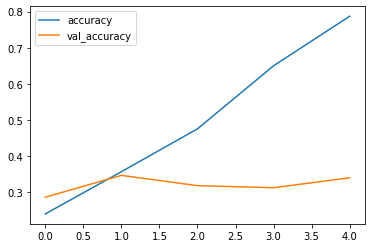

In [ ]:
df[['accuracy', 'val_accuracy']].plot()

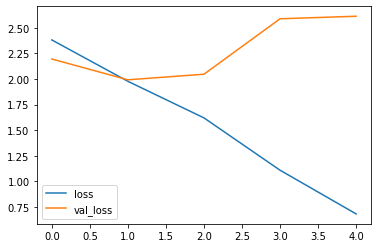

In [ ]:
df[['loss', 'val_loss']].plot()

Still overfitting

###Data augmentation

Data augmentation

In [ ]:
for i_batch, l_batch in train.take(1):
  print(i_batch.shape)
  print(l_batch.shape)

(32, 180, 180, 3)
(32,)


In [ ]:
augment = models.Sequential([layers.RandomFlip('horizontal', input_shape=(180, 180, 3)),
                             layers.RandomRotation(0.1),
                             layers.RandomZoom(0.2)])

<ipython-input-25-f076b8f36932>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3, 3, i+1)


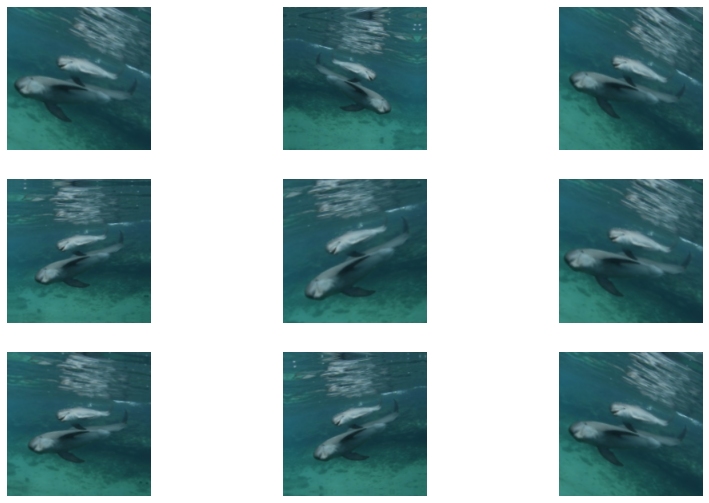

In [ ]:
plt.figure(figsize = (14, 9))

for image, label in train.take(3):
  for i in range(9):
    aug_im = augment(image)
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(aug_im[0].numpy().astype('uint8'))
    plt.axis('off')


###Model 3

In [ ]:
model_3 = models.Sequential([augment,
                             layers.Rescaling(1.0/255),
                             layers.Conv2D(16, 4, padding='same', activation='relu', input_shape=(180, 180, 3)),
                             layers.MaxPooling2D(),
                             layers.Conv2D(32, 4, padding='same', activation='relu', input_shape=(180, 180, 3)),
                             layers.MaxPooling2D(),
                             layers.Conv2D(64, 4, padding='same', activation='relu', input_shape=(180, 180, 3)),
                             layers.MaxPooling2D(),
                             layers.Dropout(.2),
                             layers.Flatten(),
                             layers.Dense(128, activation='sigmoid'),
                             layers.Dense(16, activation='softmax')])

In [ ]:
model_3.compile(optimizer = 'adam',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])

In [ ]:
summary_3 = model_3.fit(train,
                        validation_data = test,
                        epochs = 10)

Epoch 1/10
220/220 [==============================] - 11s 47ms/step - loss: 2.2771 - accuracy: 0.2384 - val_loss: 2.1537 - val_accuracy: 0.2803
Epoch 2/10
220/220 [==============================] - 10s 46ms/step - loss: 2.0875 - accuracy: 0.3022 - val_loss: 2.0470 - val_accuracy: 0.3288
Epoch 3/10
220/220 [==============================] - 10s 46ms/step - loss: 2.0125 - accuracy: 0.3380 - val_loss: 1.9808 - val_accuracy: 0.3390
Epoch 4/10
220/220 [==============================] - 10s 46ms/step - loss: 1.9453 - accuracy: 0.3554 - val_loss: 1.9859 - val_accuracy: 0.3425
Epoch 5/10
220/220 [==============================] - 10s 47ms/step - loss: 1.8853 - accuracy: 0.3772 - val_loss: 1.9343 - val_accuracy: 0.3715
Epoch 6/10
220/220 [==============================] - 10s 46ms/step - loss: 1.8353 - accuracy: 0.3884 - val_loss: 1.8602 - val_accuracy: 0.3840
Epoch 7/10
220/220 [==============================] - 10s 46ms/step - loss: 1.7729 - accuracy: 0.4116 - val_loss: 1.8227 - val_accuracy:

In [ ]:
df = pd.DataFrame(summary_3.history)
df

,loss,accuracy,val_loss,val_accuracy
0,2.277132,0.238360,2.153735,0.280342
1,2.087497,0.302150,2.046990,0.328775
2,2.012538,0.338032,1.980757,0.339031
3,1.945339,0.355404,1.985882,0.342450
4,1.885321,0.377189,1.934319,0.371510
5,1.835265,0.388438,1.860192,0.384046
6,1.772886,0.411647,1.822693,0.396011
7,1.743160,0.422896,1.814998,0.409117
8,1.695806,0.436708,1.824543,0.400000
9,1.652360,0.451232,1.763219,0.408547


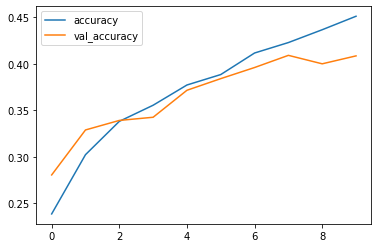

In [ ]:
df[['accuracy', 'val_accuracy']].plot()

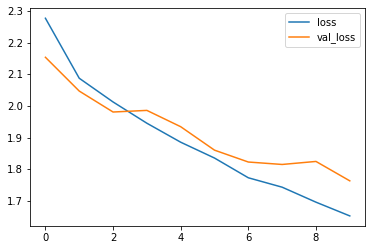

In [ ]:
df[['loss', 'val_loss']].plot()

##Data prediction

In [ ]:
jelly_fish = '/content/drive/MyDrive/jf.jpeg'


In [ ]:
jf = utils.load_img(jelly_fish, target_size = (180, 180))

In [ ]:
jf_arr = utils.img_to_array(jf)
jf_arr = tf.expand_dims(jf_arr, 0)

In [ ]:
predict_image = model_3.predict(jf_arr)
result = tf.nn.softmax(predict_image[0])

1/1 [==============================] - 0s 16ms/step


In [ ]:
print(
    "The given picture, most likely, is that of a {}. Confidence: {:.2f}%"
    .format(sea_class[np.argmax(result)], 100 * np.max(result))
)

The given picture, most likely, is that of a Squid. Confidence: 10.18%


In [ ]:
star_fish = '/content/drive/MyDrive/sf.png'
sf = utils.load_img(star_fish, target_size = (180, 180))

sf_arr = utils.img_to_array(sf)
sf_arr = tf.expand_dims(sf_arr, 0)

predict_image = model_3.predict(sf_arr)
result = tf.nn.softmax(predict_image[0])

1/1 [==============================] - 0s 20ms/step


In [ ]:
print(
    "The given picture, most likely, is that of a {}. Confidence: {:.2f}%"
    .format(sea_class[np.argmax(result)], 100 * np.max(result))
)

The given picture, most likely, is that of a Starfish. Confidence: 9.24%


#References

References:
https://www.tensorflow.org/tutorials/load_data/images
https://www.tensorflow.org/tutorials/images/classification
https://towardsai.net/p/l/impact-of-optimizers-in-image-classifiers
https://towardsdatascience.com/leaky-relu-vs-relu-activation-functions-which-is-better-1a1533d0a89f
https://www.tensorflow.org/api_docs/python/tf/keras/activations/selu

In [ ]:
%%shell
jupyter nbconvert --to html ///content/F216412_ML_CW.ipynb

[NbConvertApp] Converting notebook ///content/F216412_ML_CW.ipynb to html
[NbConvertApp] Writing 1812503 bytes to ///content/F216412_ML_CW.html
